Look at how the template building vs the baseline looks after 3 months

In [1]:
import os
import shutil

import rubin_sim.maf.metric_bundles as metric_bundles
import rubin_sim.maf.metrics as metrics
import rubin_sim.maf.slicers as slicers

from rubin_sim.maf.batches.common import standard_summary

import rubin_sim.maf.batches as batches
import rubin_sim.maf.db as db
import rubin_sim.maf.metric_bundles as mb

import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np

In [2]:
nside = 128
night_lim = 365 #30*3
def tt_batch(run_name, time_min=16):

    standard_stats = standard_summary()
    bundle_list = []
    bands = 'r'
    
    for band in bands:
        sql = "night < %i and visitExposureTime > %f and band = '%s'" % (night_lim, time_min, band)

        slicer = slicers.HealpixSlicer(nside=nside)
        metric = metrics.TemplateTime(seeing_percentile=100,
                                      m5_percentile=100,
                                      n_images_in_template=3,)

        bundle_list.append(metric_bundles.MetricBundle(metric, 
                                                       slicer, 
                                                       sql,
                                                       summary_metrics=standard_stats,
                                                       run_name=run_name))

    bd = metric_bundles.make_bundles_dict_from_list(bundle_list)

    return bd

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plot_handler.py:665: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn("Cannot plot object metric values with this plotter.")
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation tried to make 6037 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation tried to make 406 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation tried to make 221 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation tried to make 229 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation tried to make 346

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plot_handler.py:665: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn("Cannot plot object metric values with this plotter.")
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation tried to make 7453 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation tried to make 289 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation tried to make 4963 bins, returning 200
  warnings.warn(


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plot_handler.py:665: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn("Cannot plot object metric values with this plotter.")
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation tried to make 6039 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation tried to make 327 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation tried to make 4873 bins, returning 200
  warnings.warn(


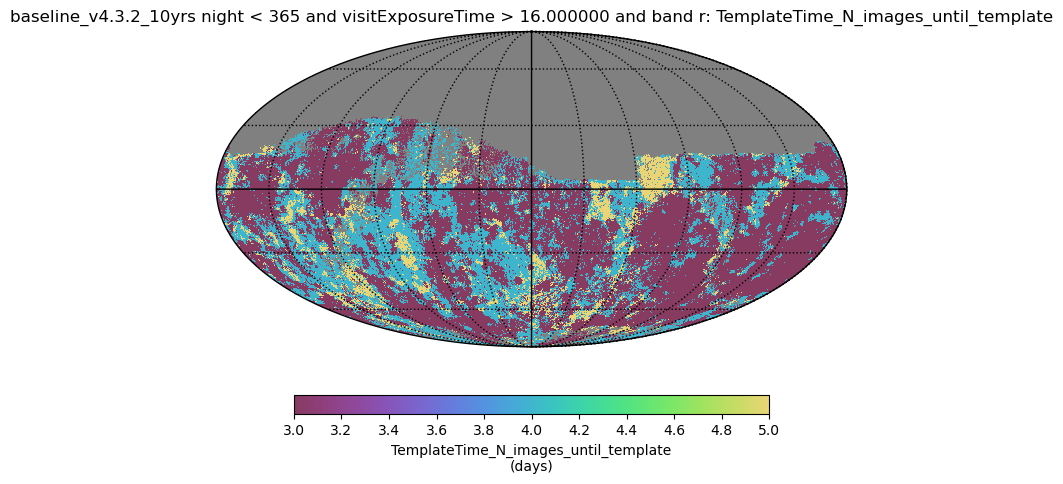

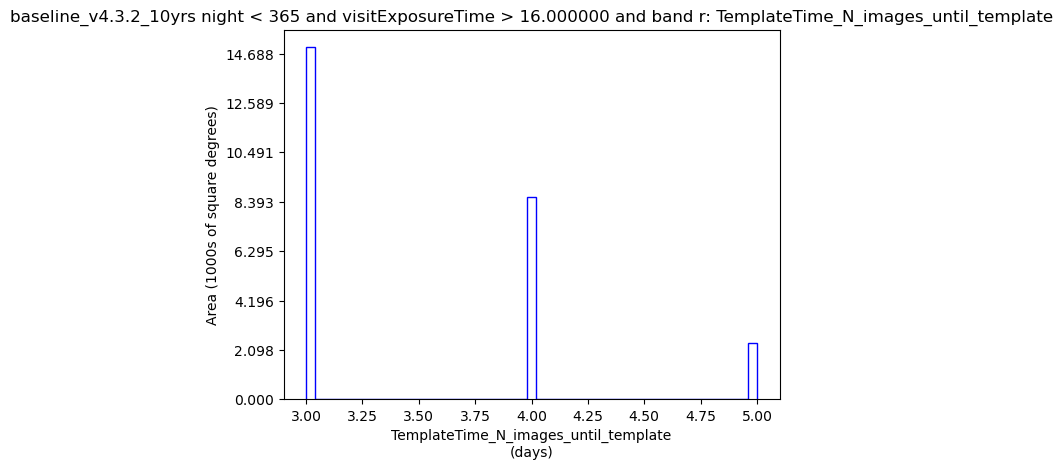

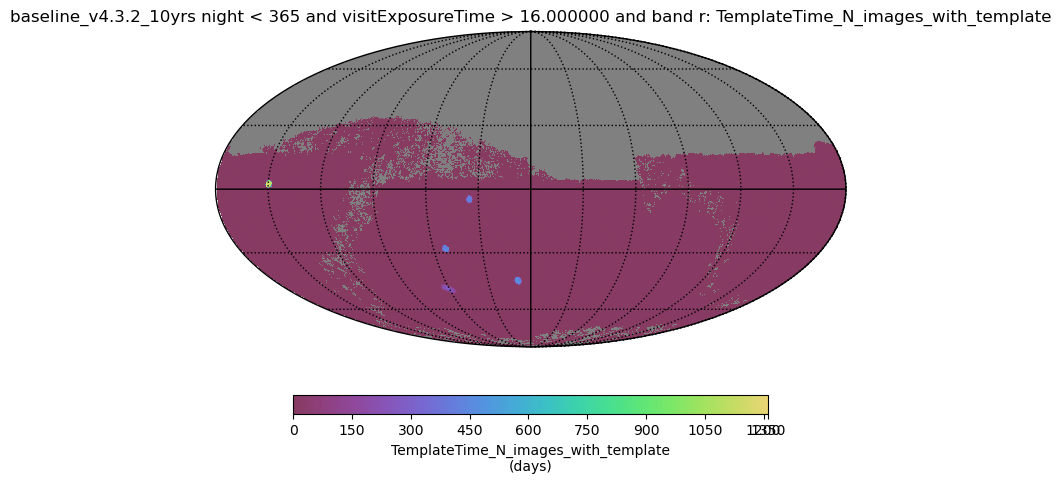

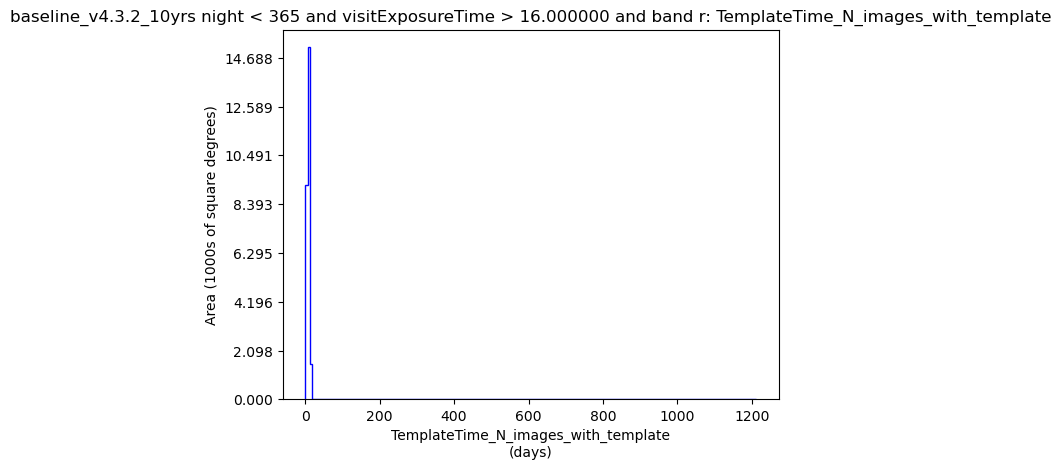

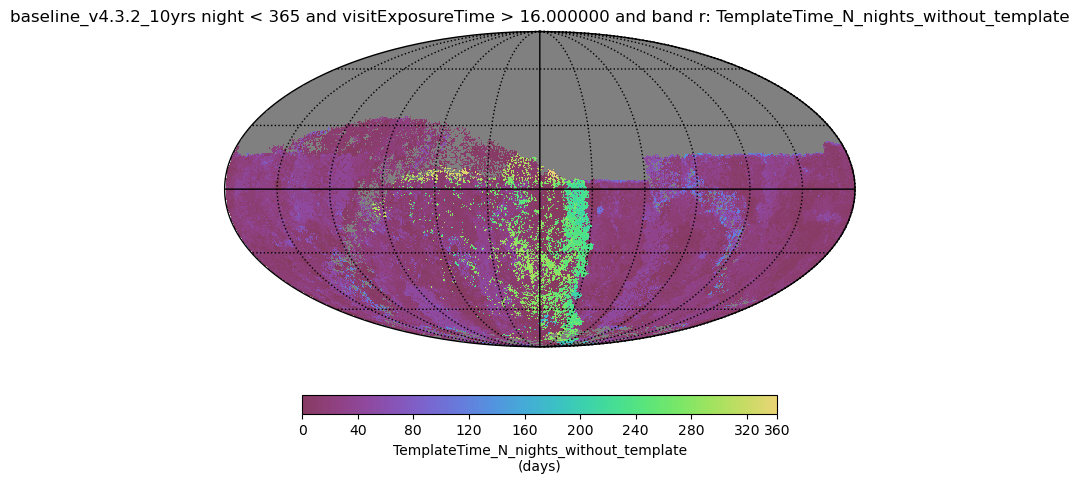

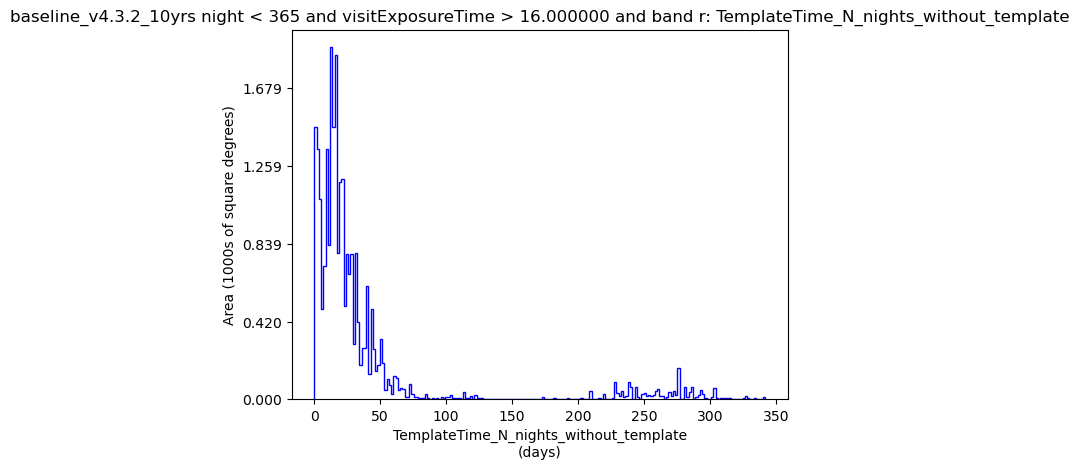

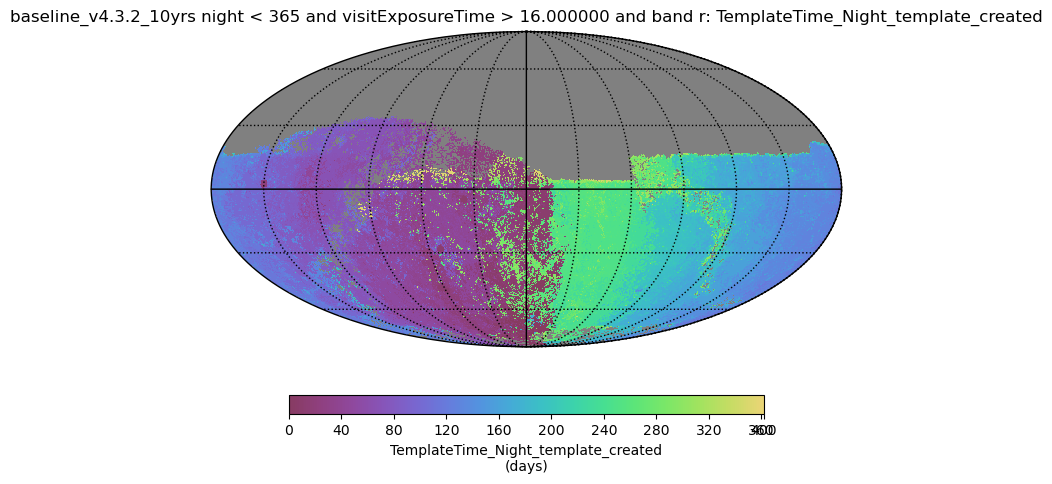

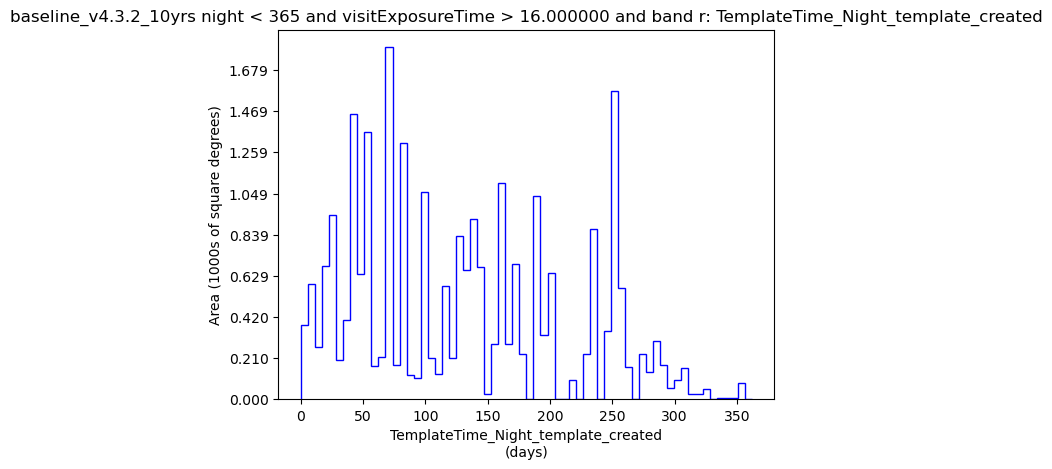

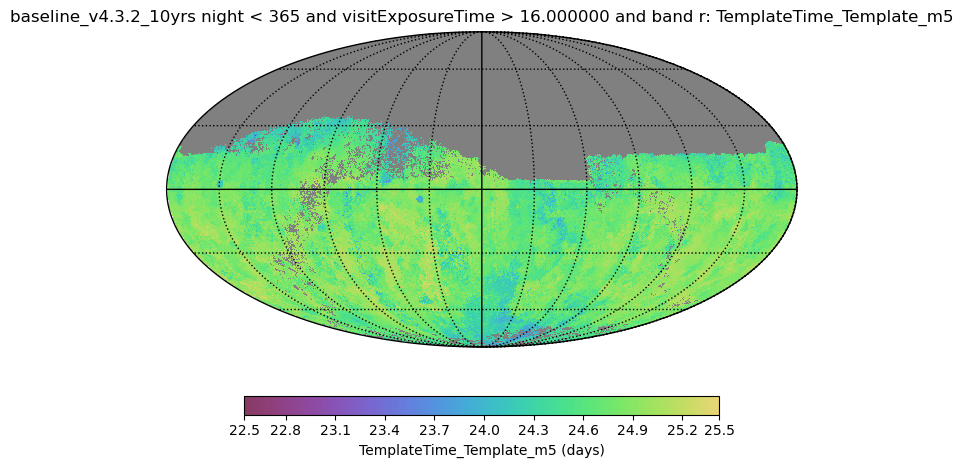

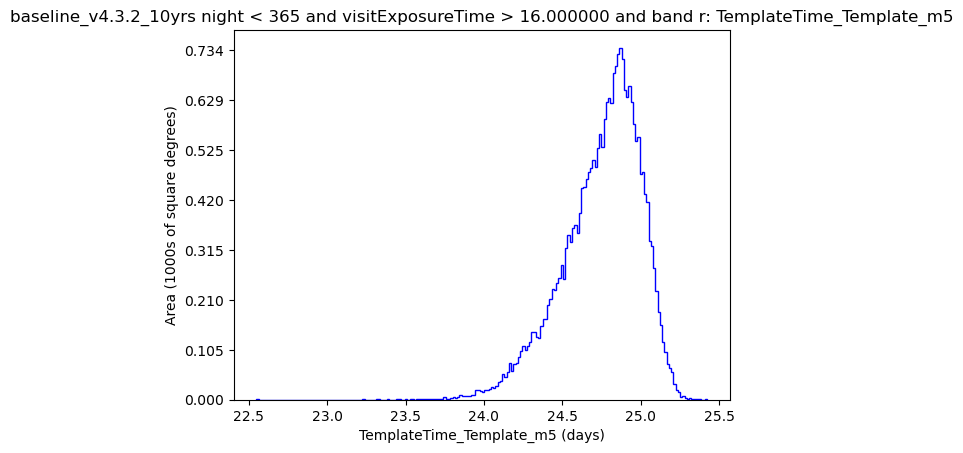

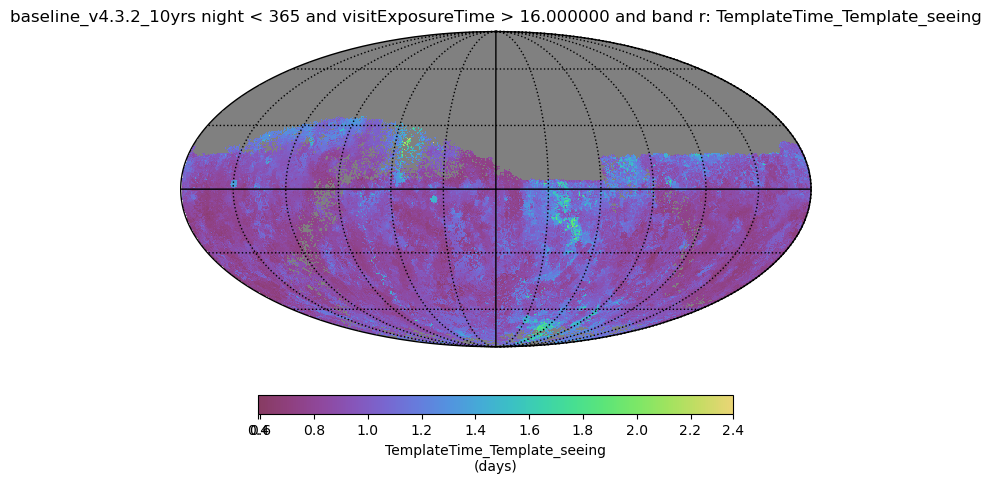

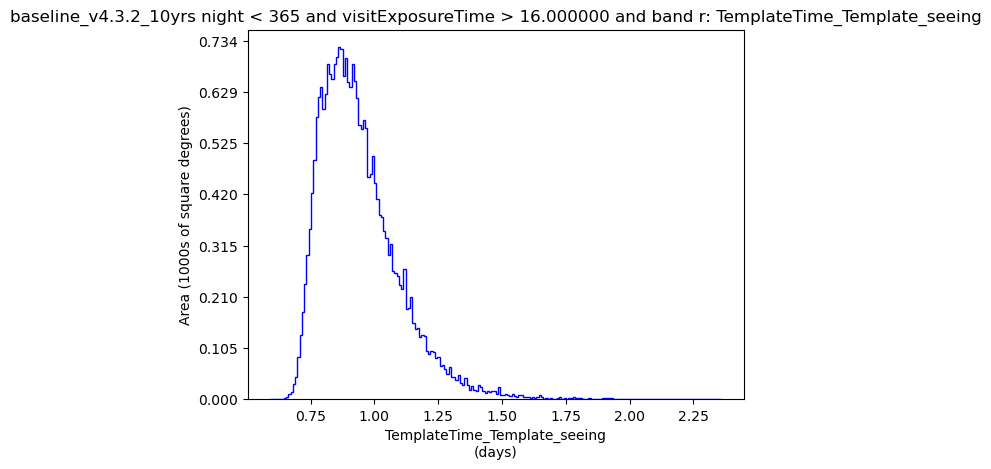

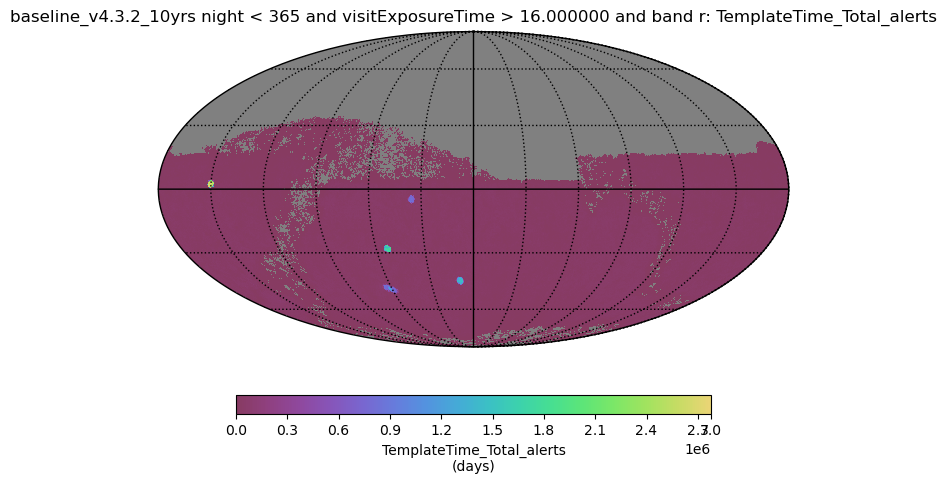

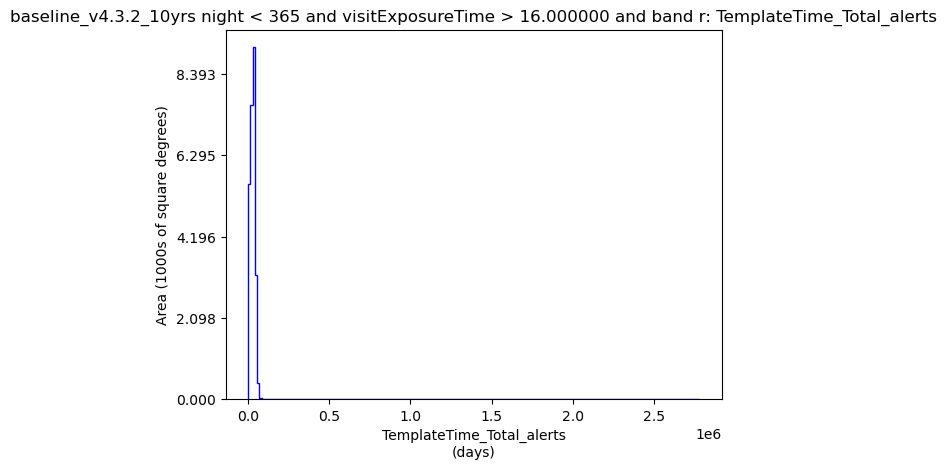

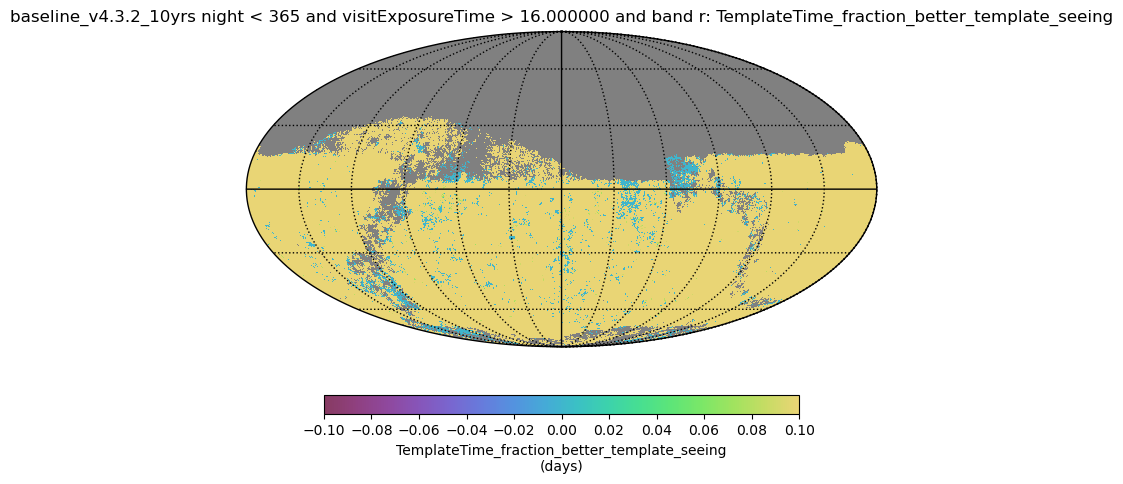

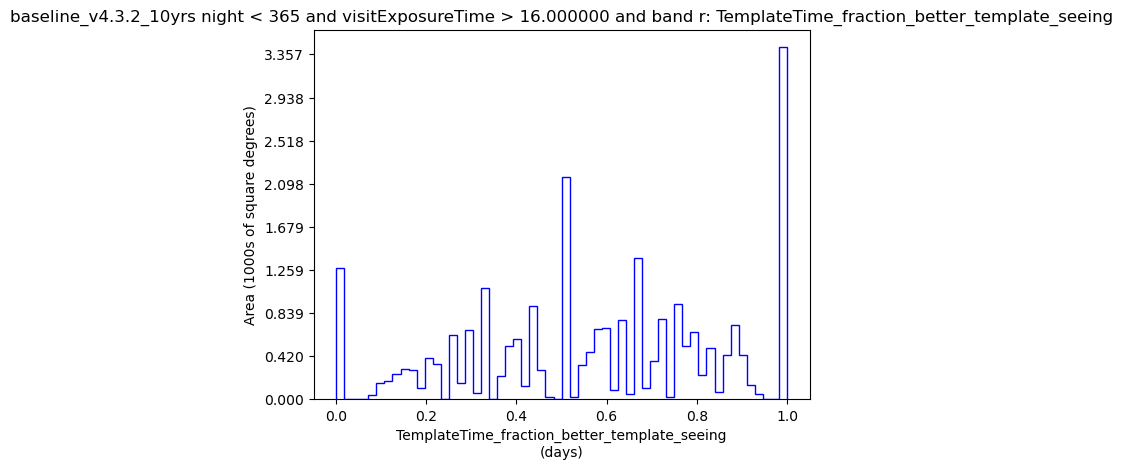

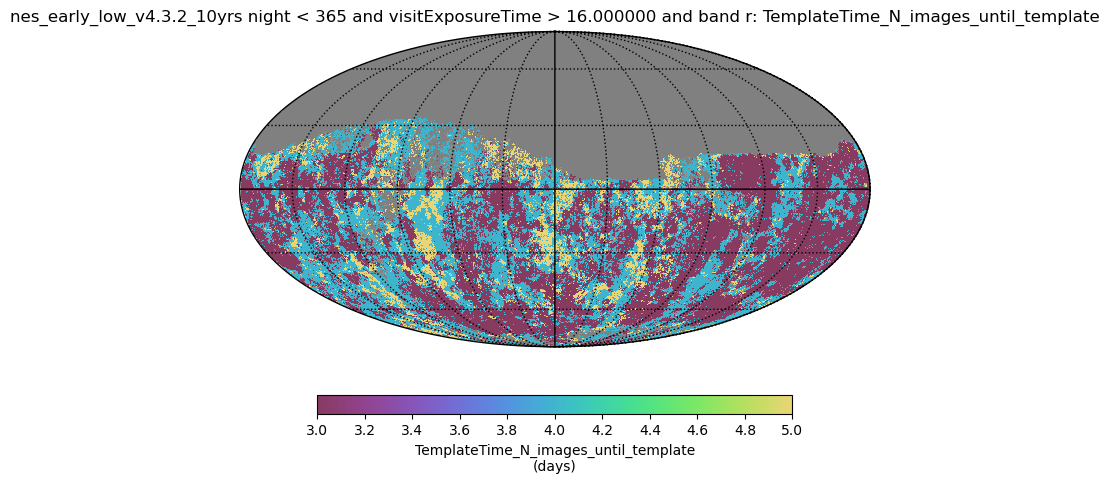

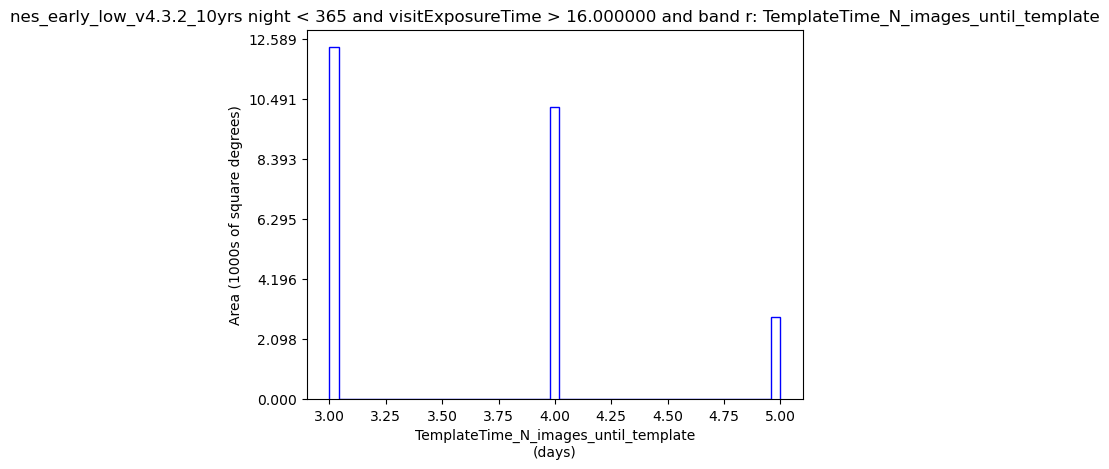

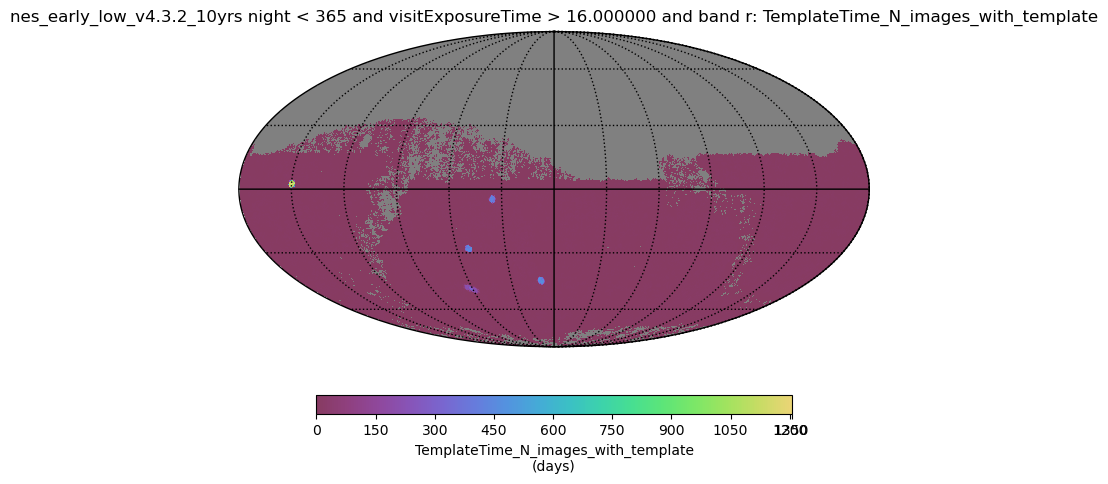

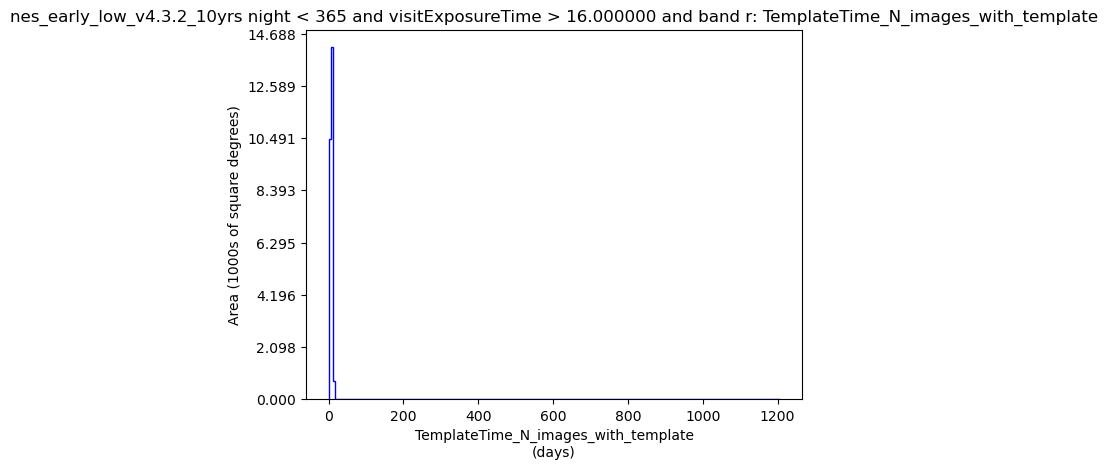

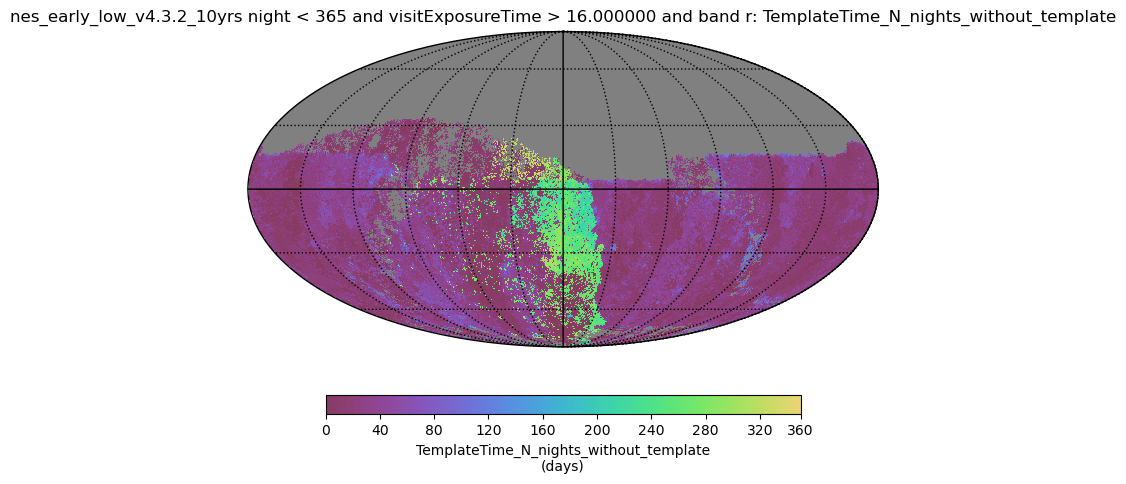

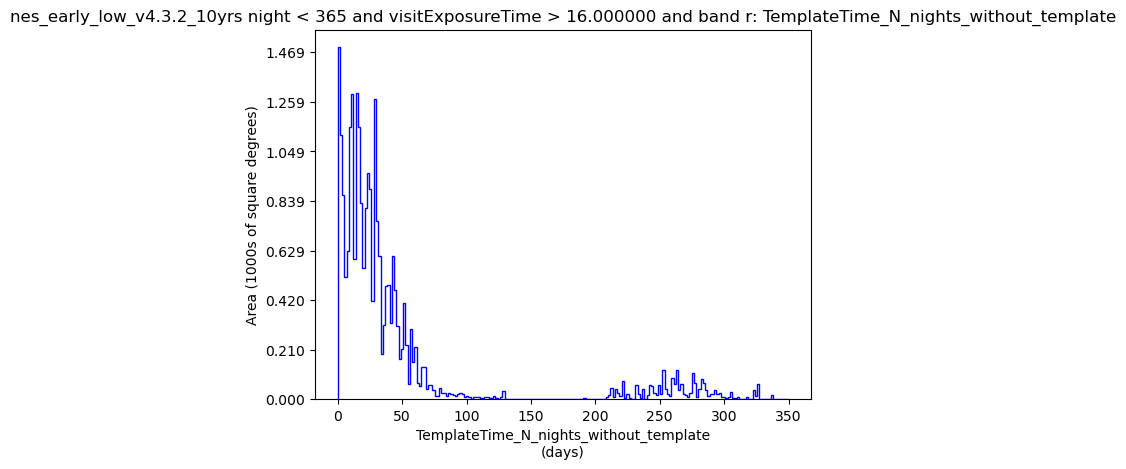

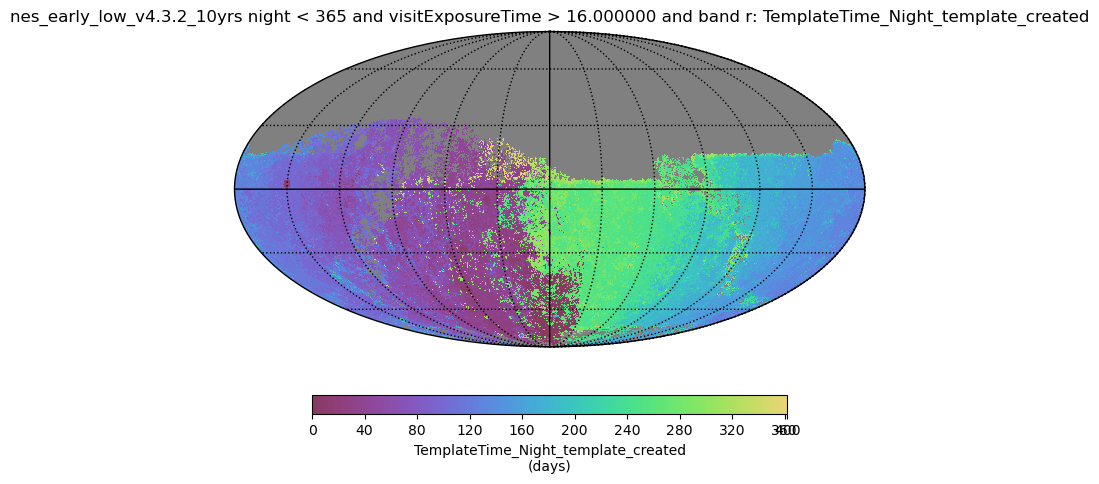

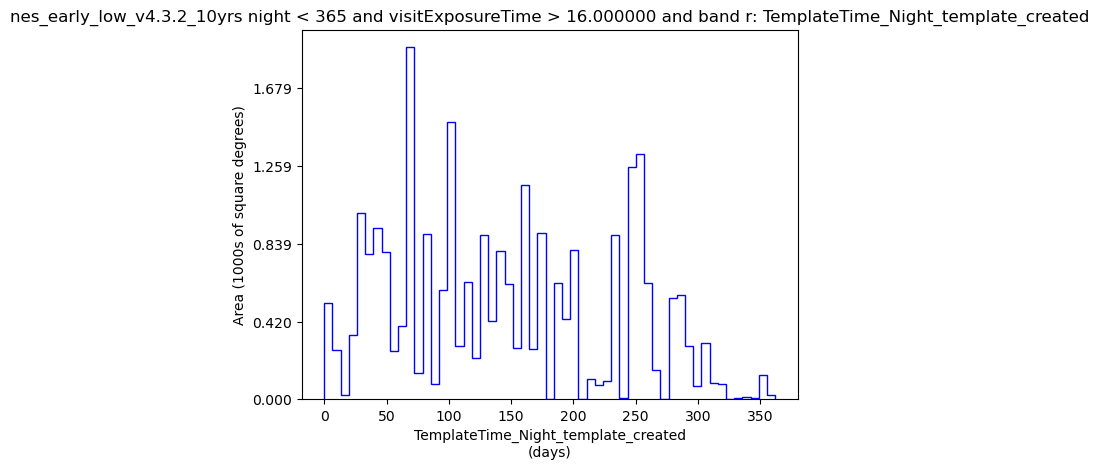

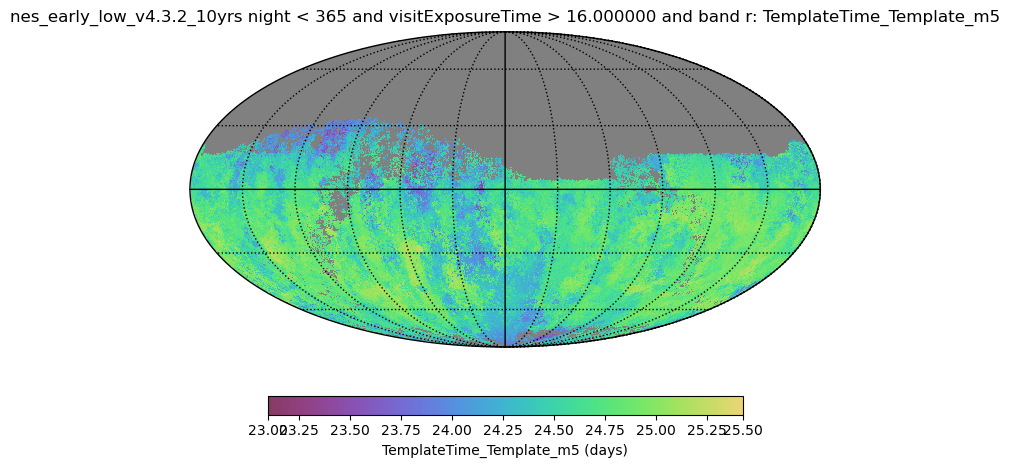

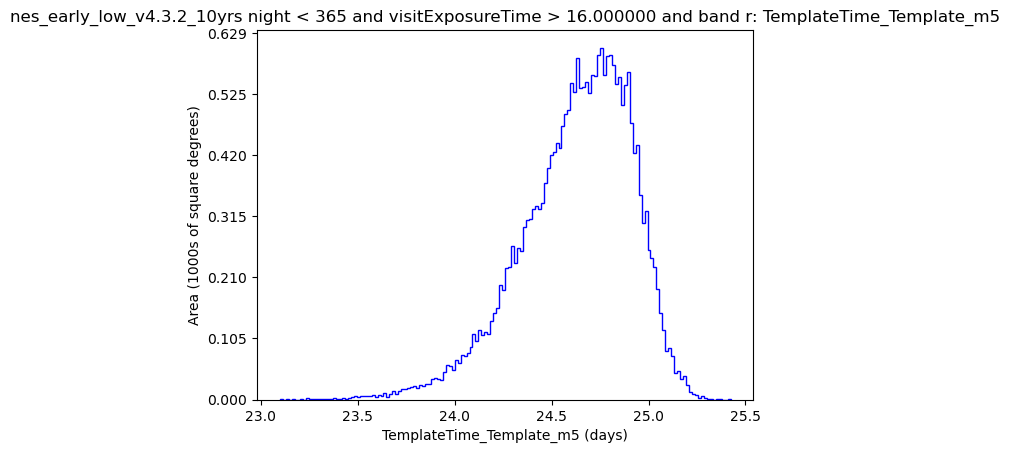

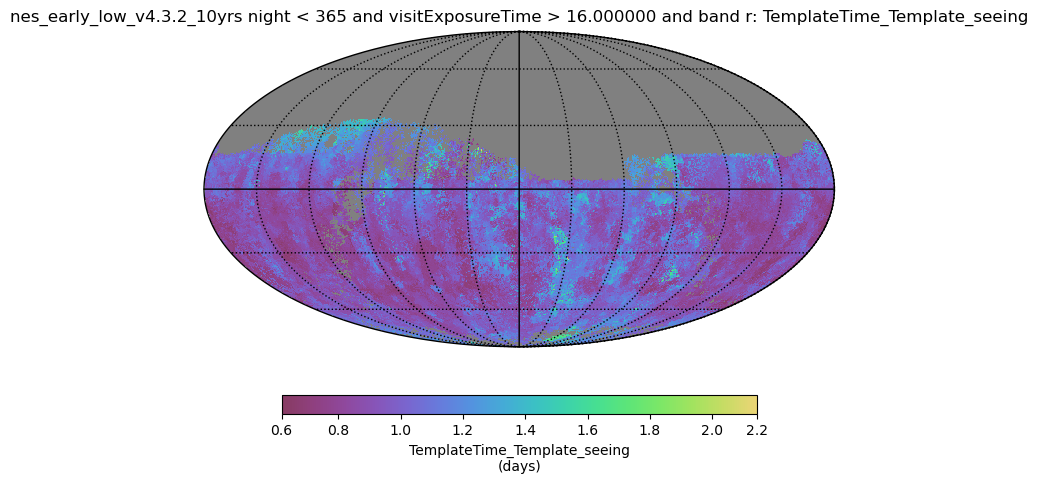

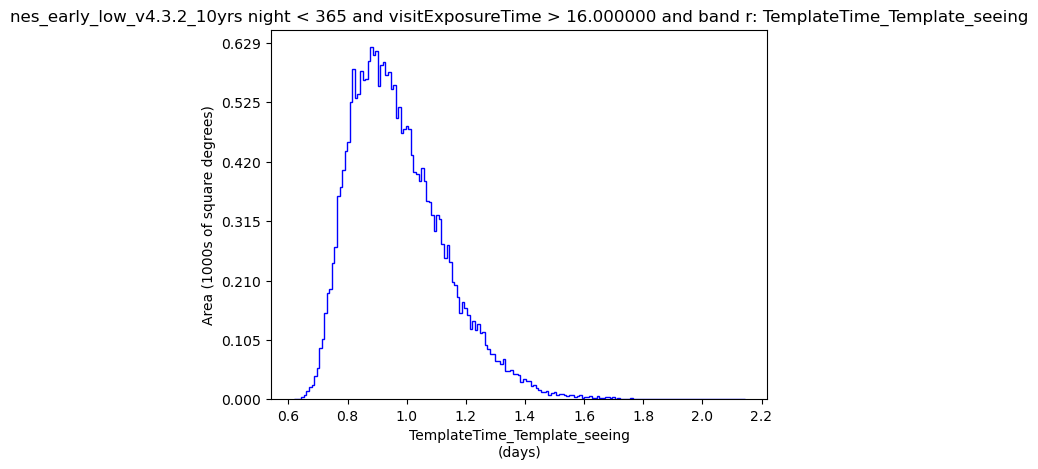

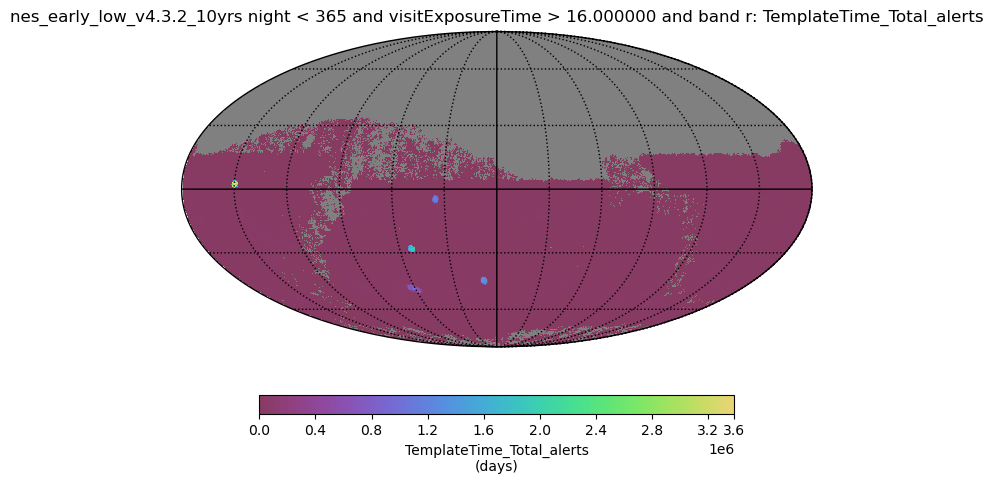

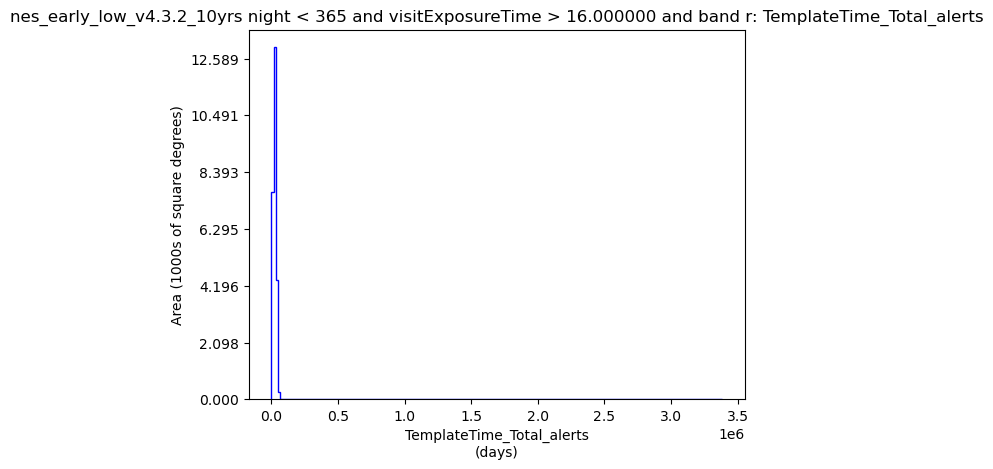

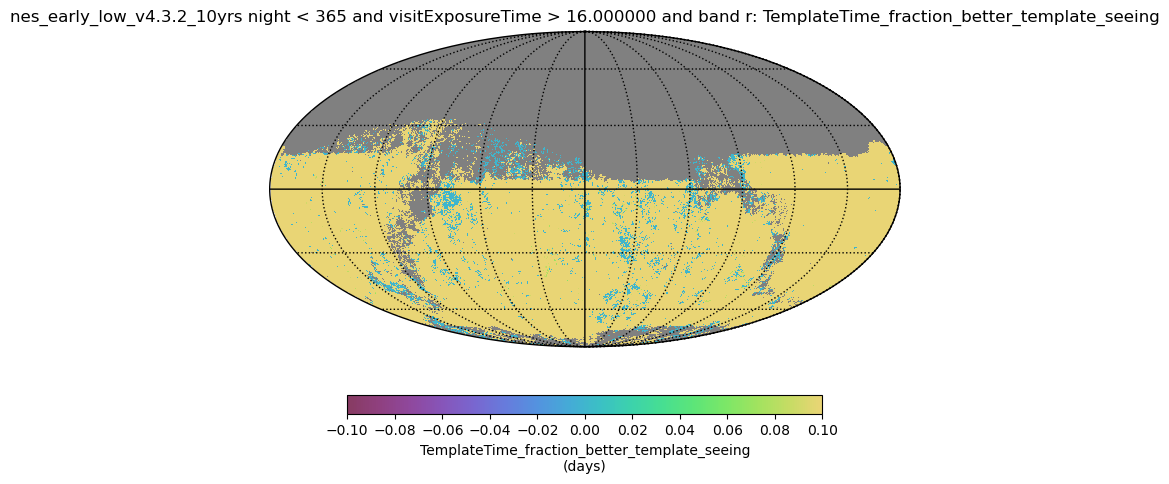

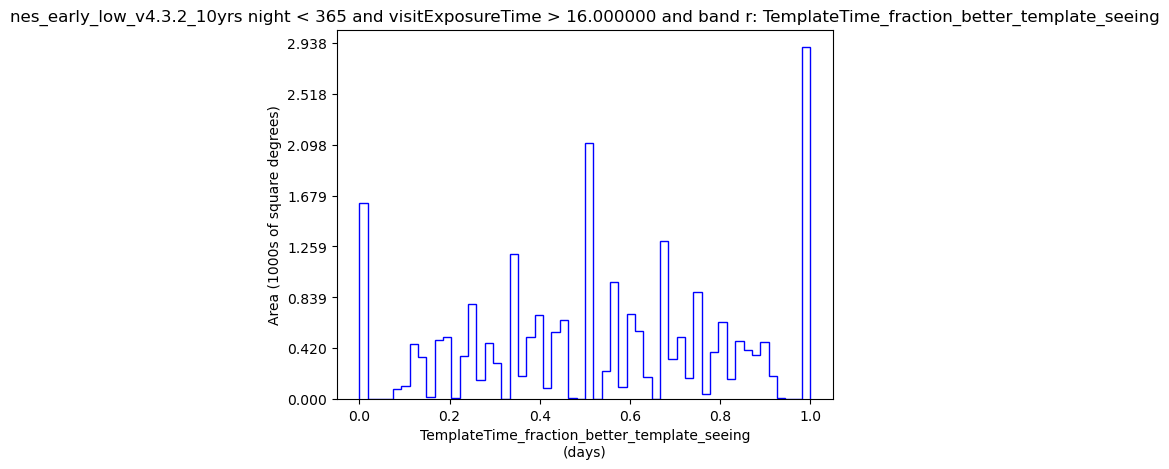

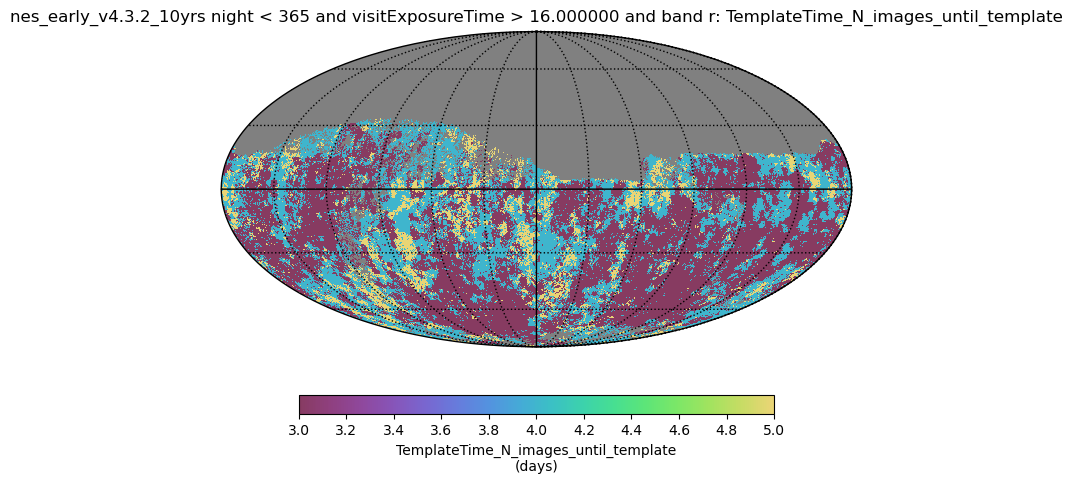

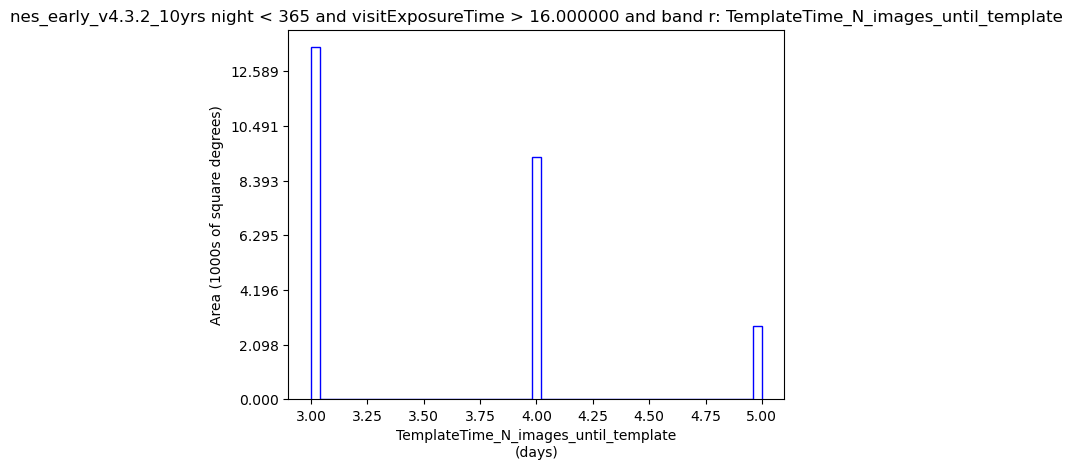

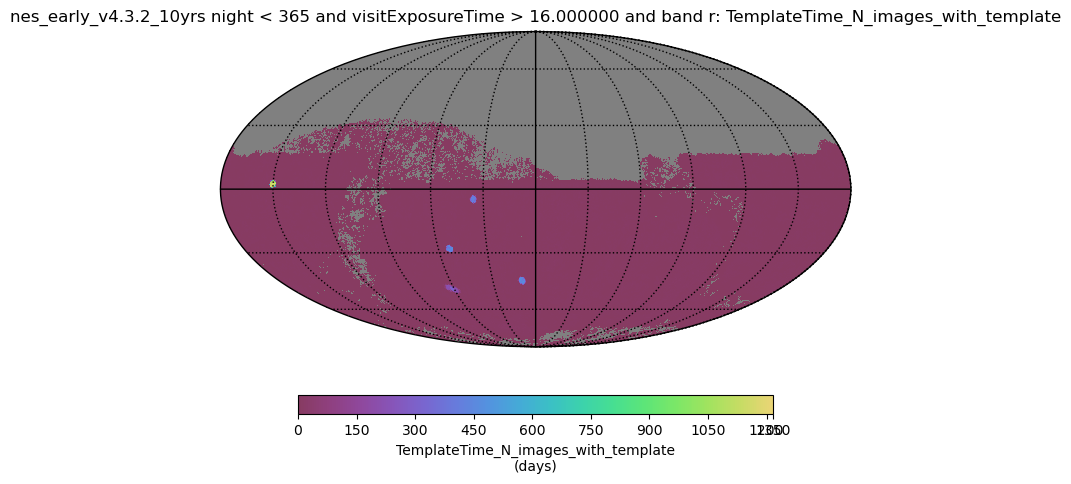

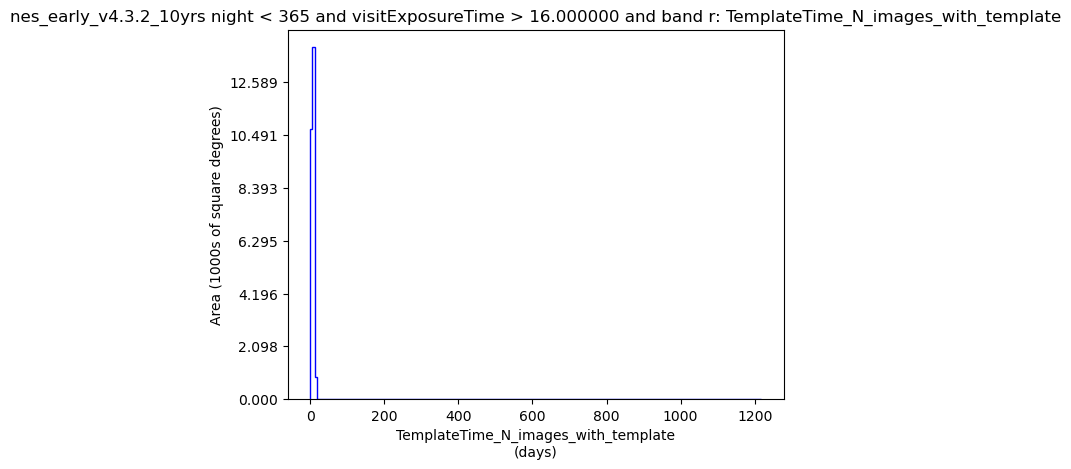

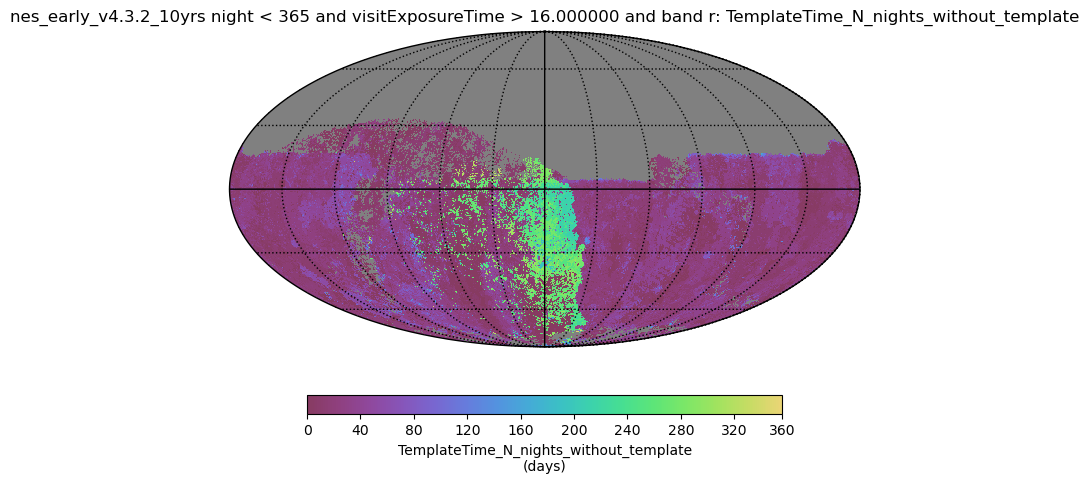

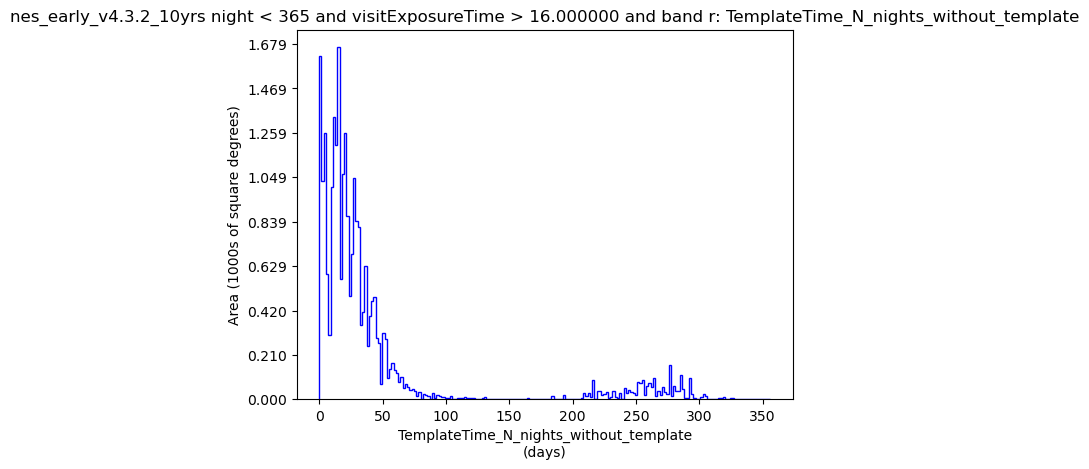

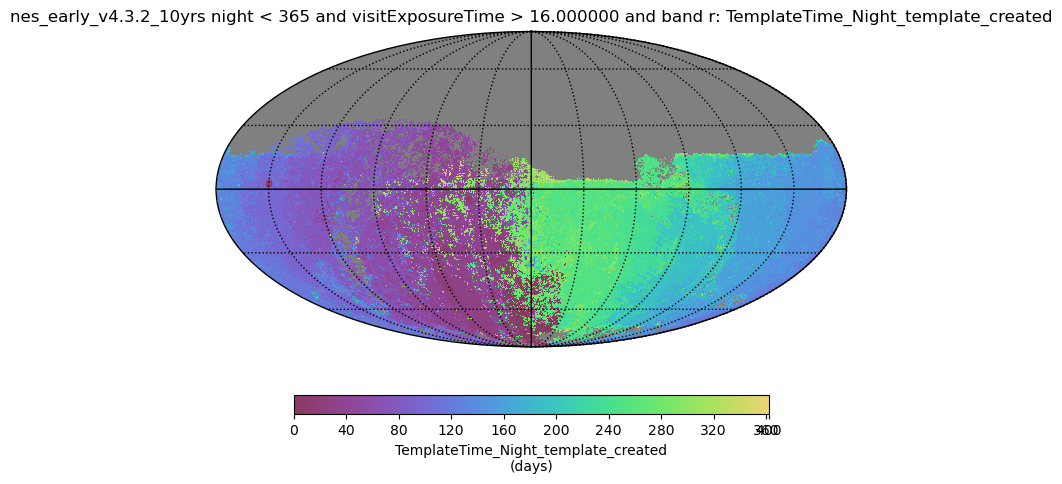

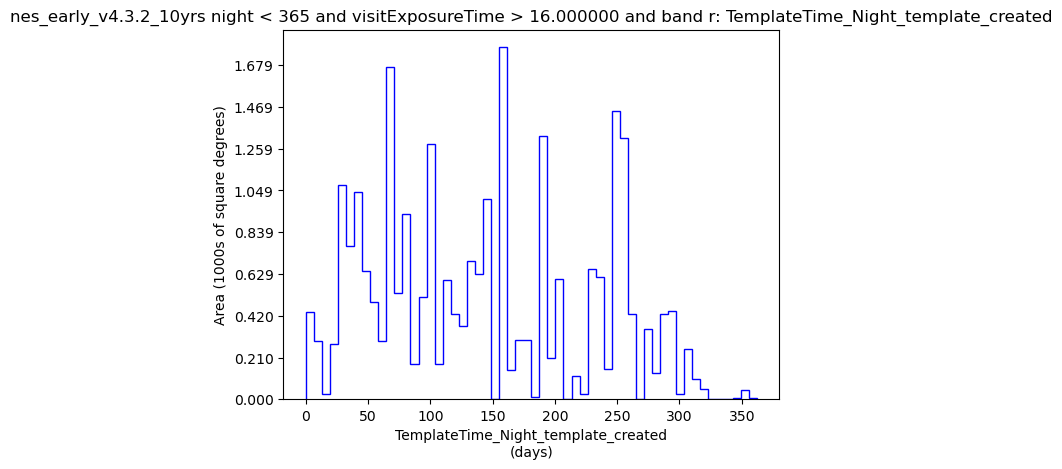

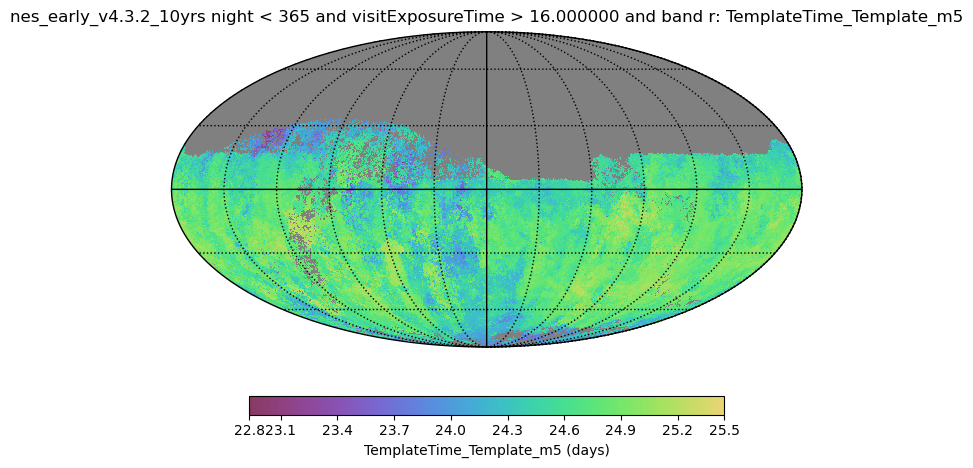

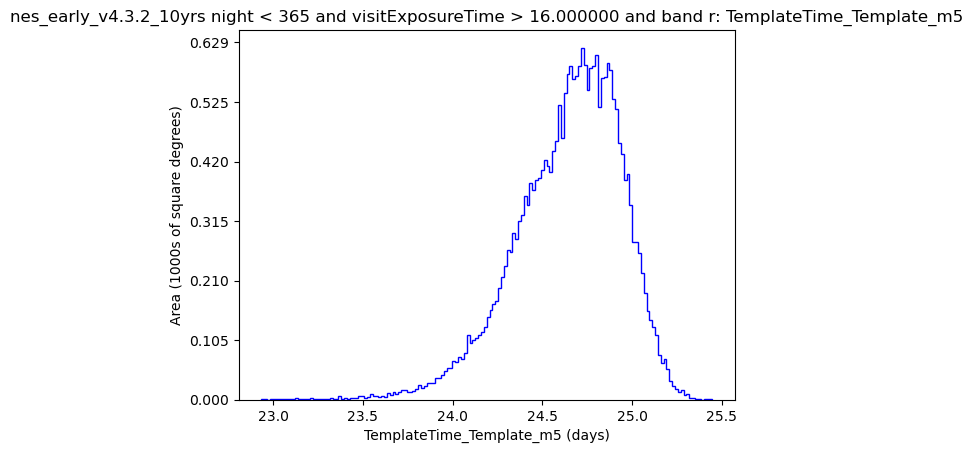

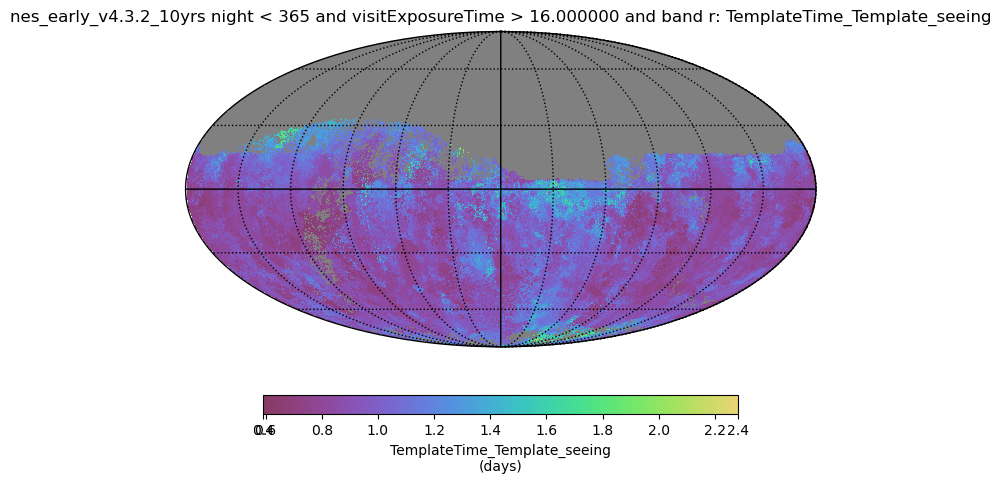

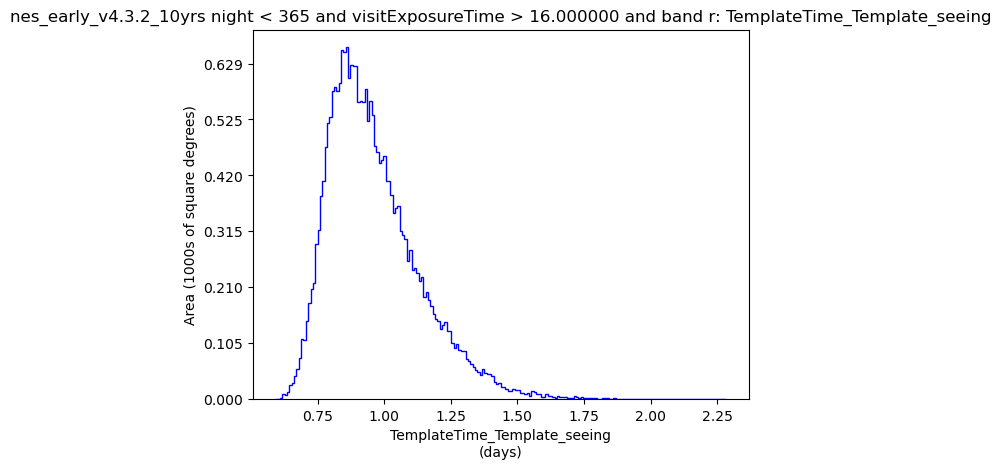

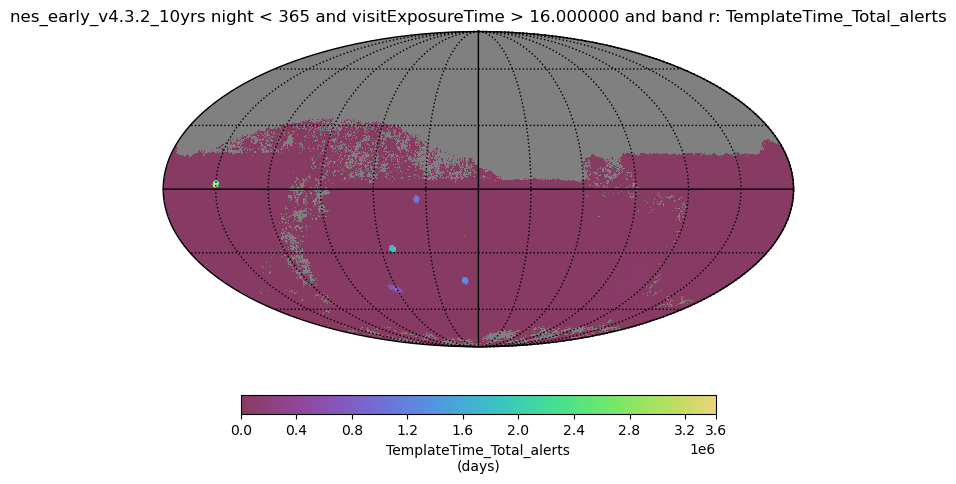

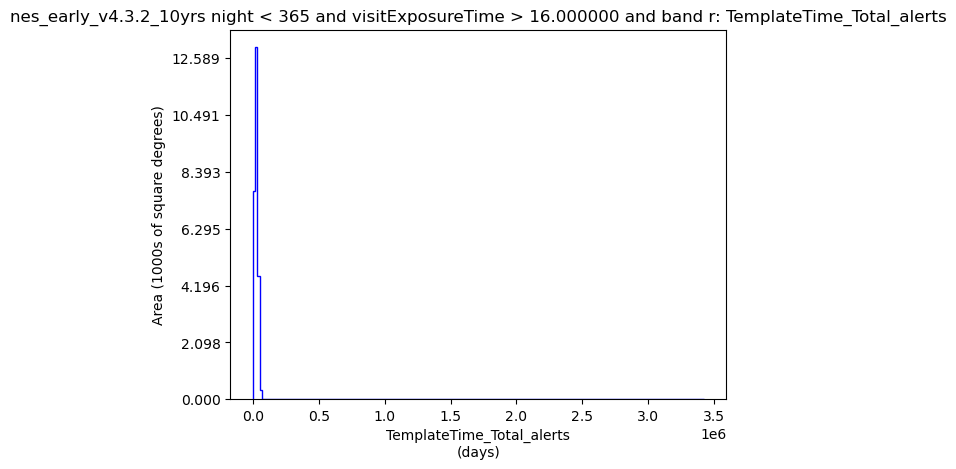

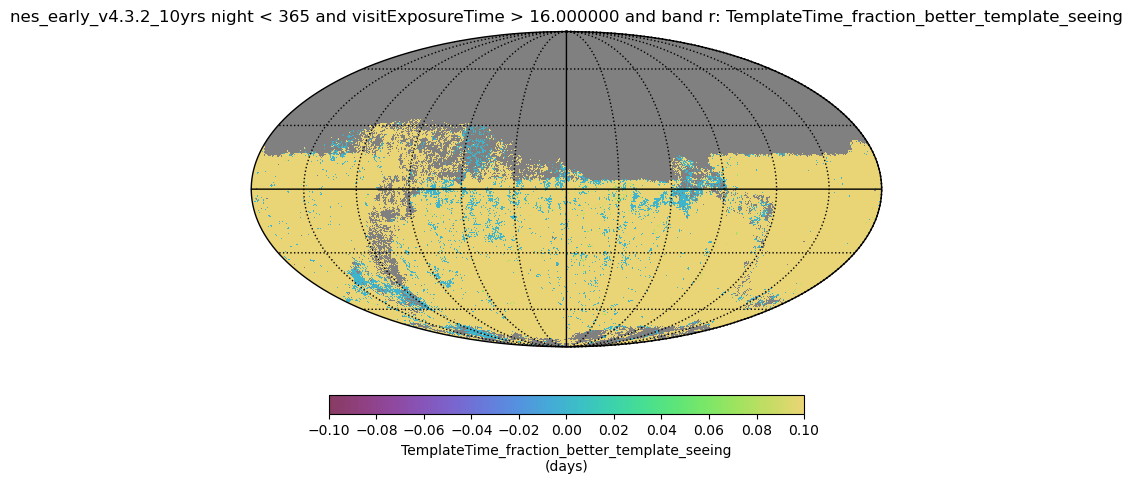

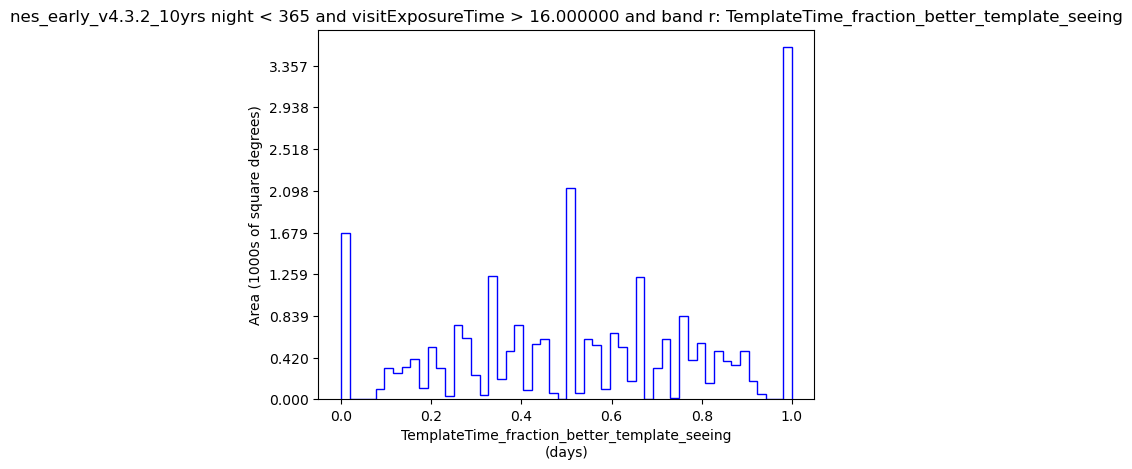

In [3]:
files = ["baseline_v4.3.2_10yrs.db", "nes_early_low_v4.3.2_10yrs.db", "nes_early_v4.3.2_10yrs.db"] 
run_names = [filename.replace('.db', '') for filename in files]
groups = []
for filename, name in zip(files, run_names):

    bdict = tt_batch(name)
    results_db = db.ResultsDb(out_dir=name + "_ttime")
    group = mb.MetricBundleGroup(
        bdict,
        filename,
        out_dir="temp",
        results_db=results_db,
        save_early=False,
    )
    group.run_all()
    group.plot_all(closefigs=False)
    groups.append(group)

In [4]:
groups[2].bundle_dict

{'nes_early_v4_3_2_10yrs_TemplateTime_night_lt_365_and_visitExposureTime_gt_16_000000_and_band_r_HEAL': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x347a30770>,
 'TemplateTime_N_images_until_template': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x34789fe30>,
 'TemplateTime_N_images_with_template': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x347b47590>,
 'TemplateTime_N_nights_without_template': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x3268d1eb0>,
 'TemplateTime_Night_template_created': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x3479872f0>,
 'TemplateTime_Template_m5': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x347a4c0b0>,
 'TemplateTime_Template_seeing': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x3478e87d0>,
 'TemplateTime_Total_alerts': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x347c4b560>,
 'TemplateTime_fraction_better_template_seeing':

In [6]:
a = hp.nside2pixarea(nside, degrees=True)

print('    baseline, nes_el, nes_e' )

sums = np.zeros(3)
for bandname in 'r':
    areas = []
    areas.append(np.where(~groups[0].bundle_dict['baseline_v4_3_2_10yrs_TemplateTime_night_lt_365_and_visitExposureTime_gt_16_000000_and_band_%s_HEAL' % bandname].metric_values.mask)[0].size * a)
    areas.append(np.where(~groups[1].bundle_dict['nes_early_low_v4_3_2_10yrs_TemplateTime_night_lt_365_and_visitExposureTime_gt_16_000000_and_band_%s_HEAL' % bandname].metric_values.mask)[0].size * a)
    areas.append(np.where(~groups[2].bundle_dict['nes_early_v4_3_2_10yrs_TemplateTime_night_lt_365_and_visitExposureTime_gt_16_000000_and_band_%s_HEAL' % bandname].metric_values.mask)[0].size * a)
    print(bandname, ' ', 'nes_e_low', )
    sums[0] += areas[0]
    sums[1] += areas[1]
    sums[2] += areas[2]

print('  ', sums[0], sums[1], sums[2])

    baseline, nes_el, nes_e
r   nes_e_low
   25930.396815621603 25420.316102744517 25631.60827792643


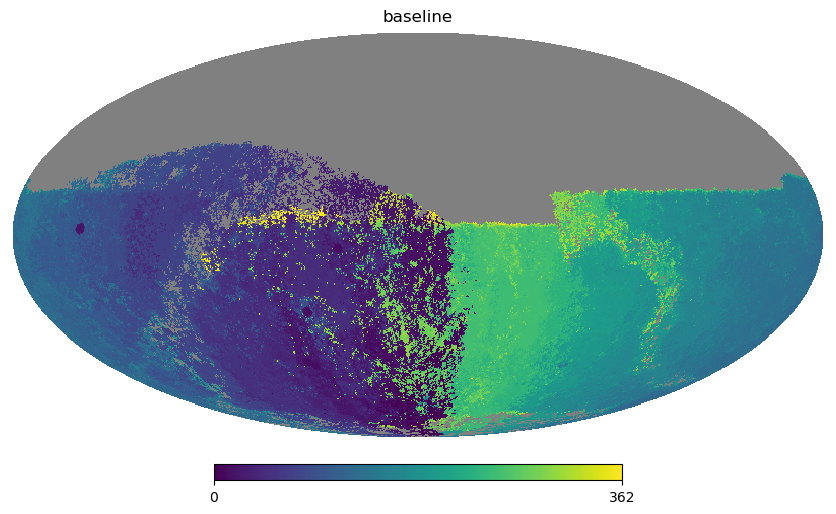

In [7]:
hp.mollview(groups[0].bundle_dict["TemplateTime_Night_template_created"].metric_values, title="baseline")

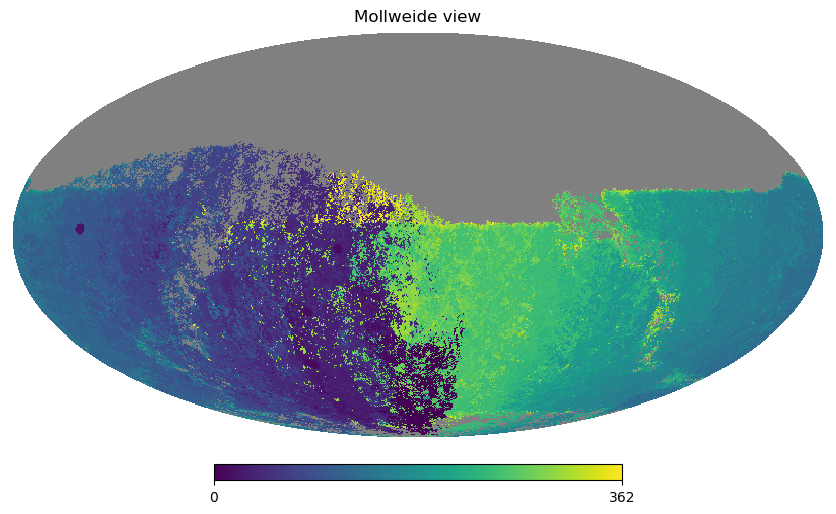

In [8]:
hp.mollview(groups[1].bundle_dict["TemplateTime_Night_template_created"].metric_values)

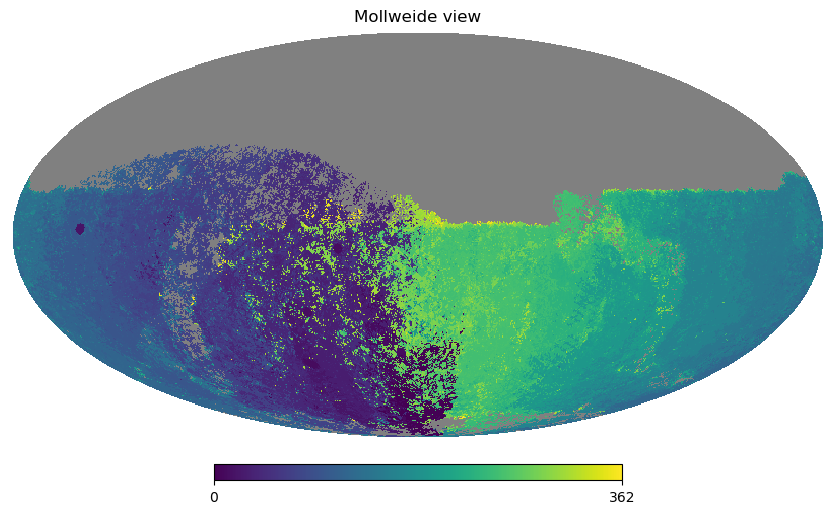

In [9]:
hp.mollview(groups[2].bundle_dict["TemplateTime_Night_template_created"].metric_values)